**Libraries and Imports**

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Utils
# import lux
# import itertools
import datetime

# DataViz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Notebook setup
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [7]:
# Loading csv into notebook
customers_exposed = pd.read_csv('../data/customers_exposed.csv', parse_dates = ['Dt_Customer'])

# Taking a look at the dataset
customers_exposed.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_PerCap,Prop_Spending_Income_pc,Avg_Ticket,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,58138.0,0.027813,64.68,57
1,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,10117.0,0.004547,7.67,40
2,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,1412.0,0.034703,24.50,64
3,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,1,82800.0,0.015882,50.58,68
4,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,0,25665.0,0.069433,68.54,65


In [9]:
# Checking integrity of csv imported into notebook
# customers_exposed.info() # Uncomment to see dataframe info

In [10]:
customers_exp_1s = customers_exposed[customers_exposed['Response'] == 1]
customers_exp_0s = customers_exposed[customers_exposed['Response'] == 0]

In [36]:
numeric_features = customers_exposed.\
                                select_dtypes(include = 'number').drop(['ID', 
                                                                        'Year_Birth',
                                                                        'AcceptedCmp1', 
                                                                        'AcceptedCmp2', 
                                                                        'AcceptedCmp3', 
                                                                        'AcceptedCmp4',
                                                                        'AcceptedCmp5',
                                                                        'Complain',
                                                                        'Response'], axis = 1).columns.tolist()
numeric_features

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Income_PerCap',
 'Prop_Spending_Income_pc',
 'Avg_Ticket',
 'Age']

In [37]:
customers_exp_1s_samples_mean = {}
customers_exp_1s_samples_std = {}

In [51]:
N = 500

for feature in numeric_features:
    customers_exp_1s_samples_mean[feature] = []
    customers_exp_1s_samples_std[feature] = []  
    for i in range(N):
        sample = customers_exp_1s.sample(30, replace = True)

        mean = sample[feature].mean()
        customers_exp_1s_samples_mean[feature].append(mean)

        std = sample[feature].std()
        customers_exp_1s_samples_std[feature].append(std)

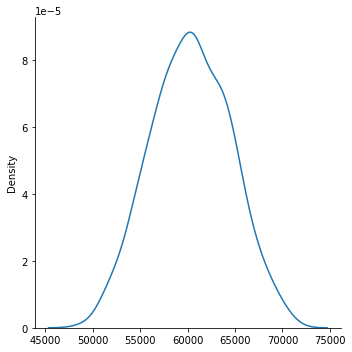

In [52]:
sns.displot(customers_exp_1s_samples_mean['Income'], kind = 'kde');